Use the iris database to answer the following quesitons:

In [1]:
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

1. What does the distribution of petal lengths look like?

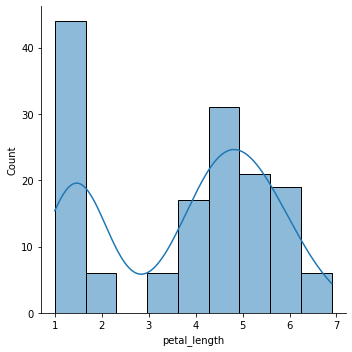

In [5]:
sns.displot(iris.petal_length, kde =True)

2. Is there a correlation between petal length and petal width?

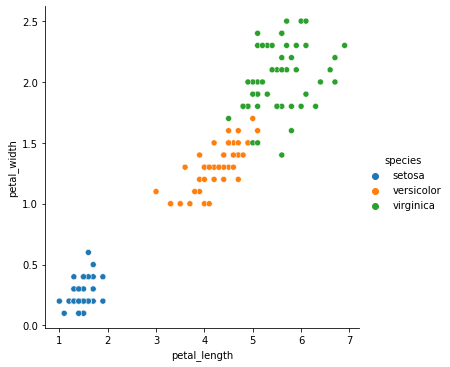

In [6]:
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')

3. Would it be reasonable to predict species based on sepal width and sepal length?

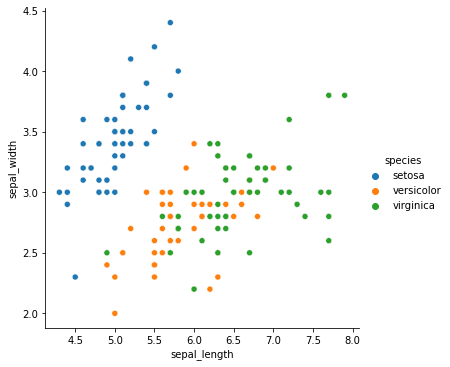

In [7]:
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

4. Which features would be best used to predict species?

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

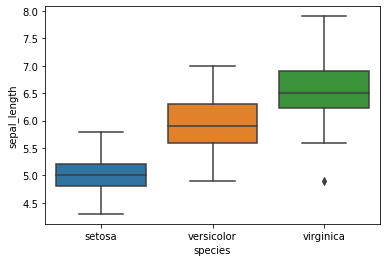

In [8]:
sns.boxplot(y = 'sepal_length', x = 'species', data = iris)

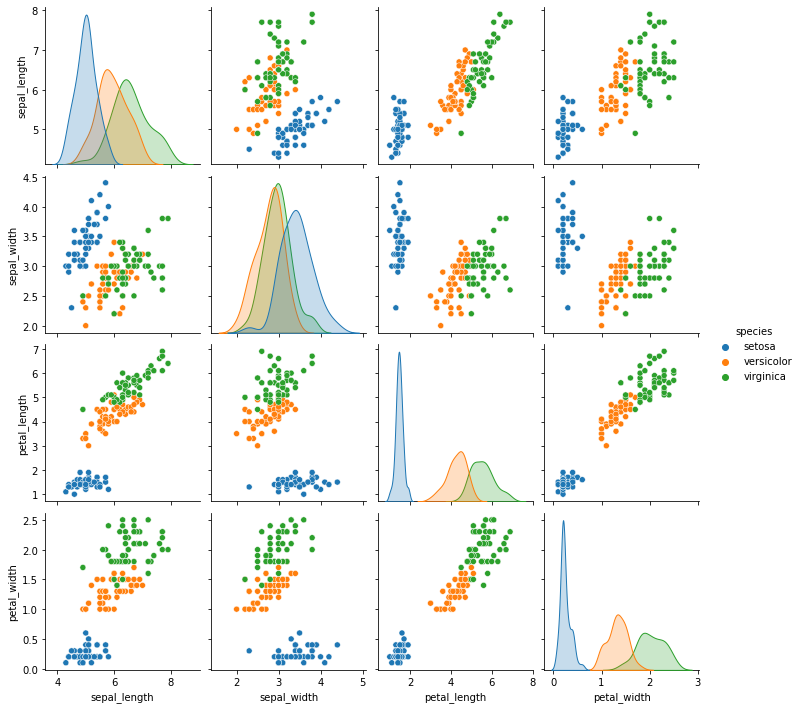

In [9]:
sns.pairplot(data = iris, hue = 'species')

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [10]:
df = sns.load_dataset('anscombe')

In [11]:
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

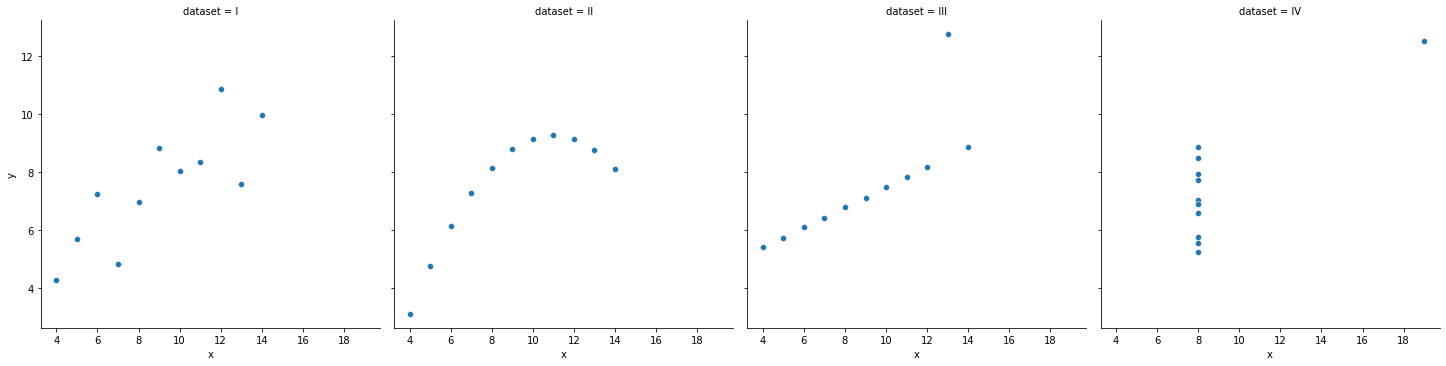

In [12]:
sns.relplot(data = df, x = 'x', y = 'y', col = 'dataset')

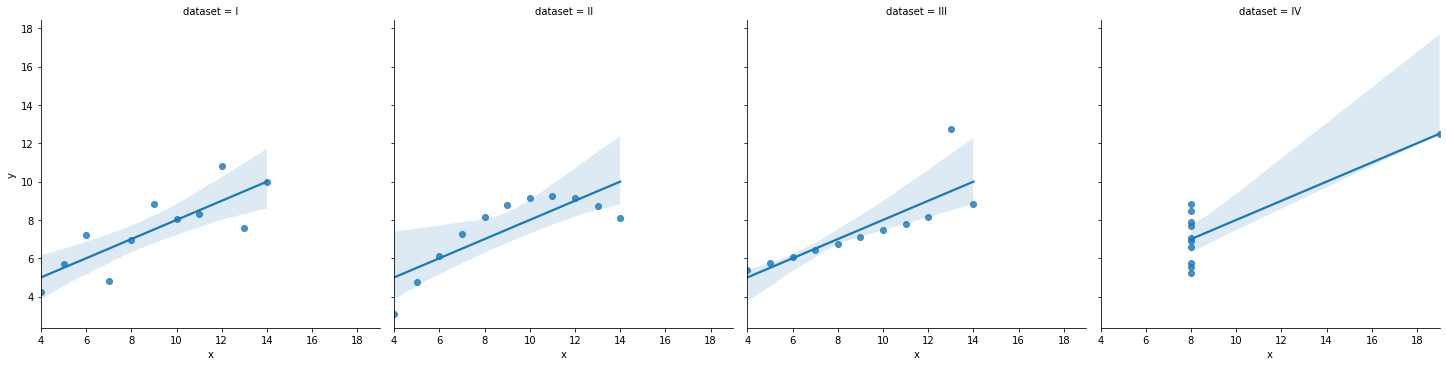

In [13]:
sns.lmplot(data = df, x = 'x', y = 'y', col = 'dataset')

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [14]:
InsectSprays = data('InsectSprays')
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

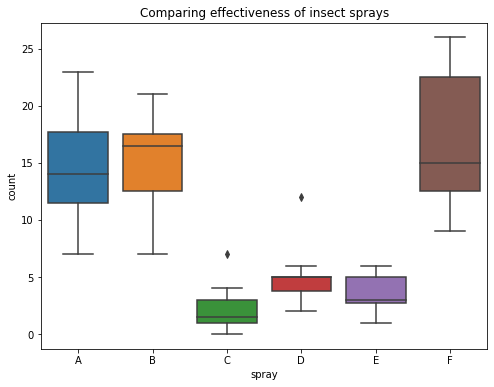

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = 'count', data = InsectSprays, x = 'spray')
plt.title('Comparing effectiveness of insect sprays')
plt.show()

3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

    - Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    - Does whether or not a province is Catholic influence fertility?
    - What measure correlates most strongly with fertility?

In [17]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [18]:
swiss['is_catholic'] = swiss.Catholic > 50

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

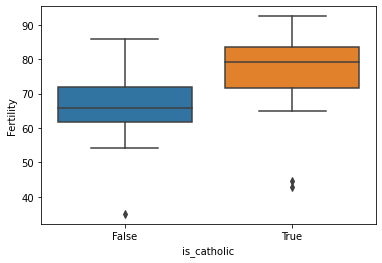

In [19]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

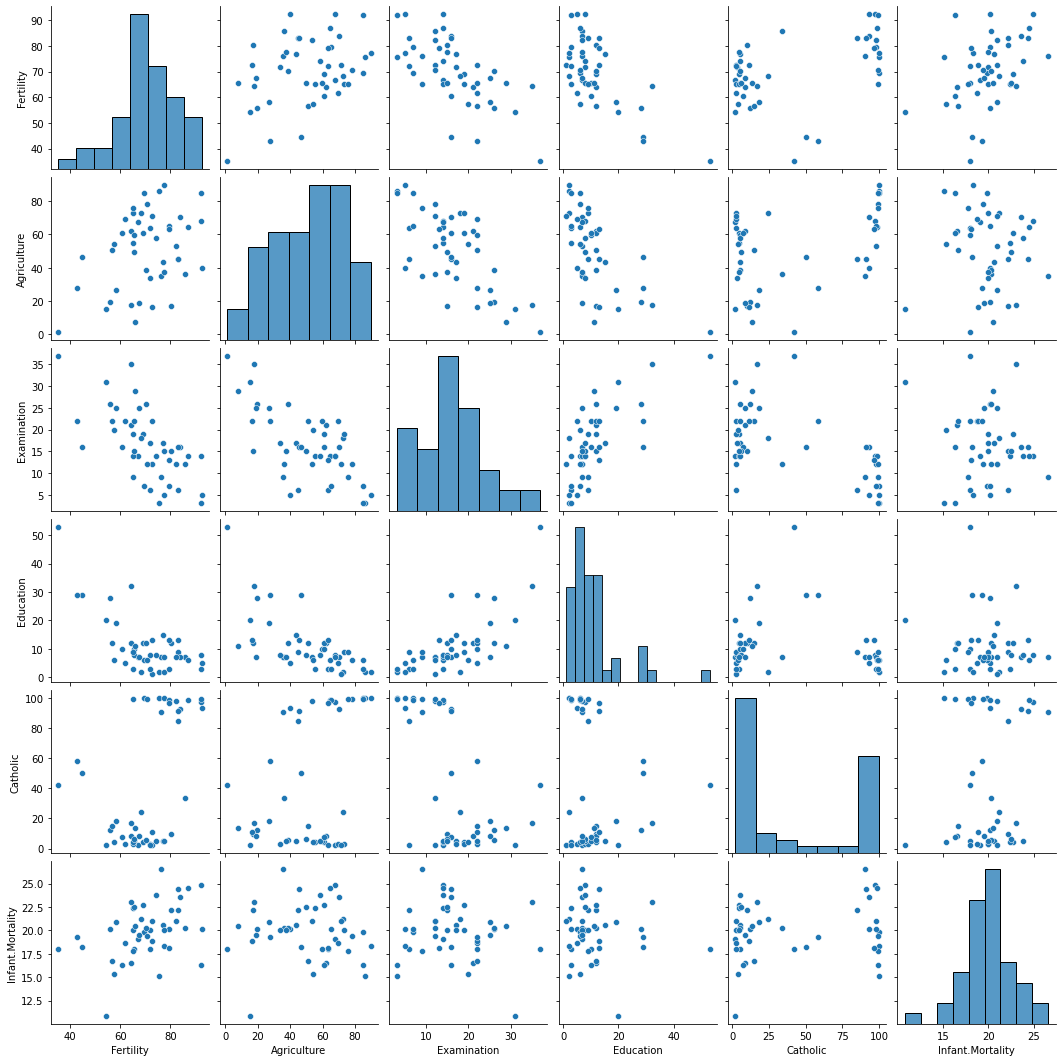

In [21]:
sns.pairplot(data = swiss.iloc[:, :-1])

4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [22]:
def get_db_url(db):
    from env import user, password, host
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [23]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [24]:
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')

In [25]:
chicken_bowl = orders[orders.item_name == 'Chicken Bowl']
chicken_bowl.sort_values('quantity', ascending = False)

,id,order_id,quantity,item_name,choice_description,item_price
409,410,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn ...",32.94
1514,1515,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",26.25
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
4435,4436,1767,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Lettuce]]",17.50
415,416,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
...,...,...,...,...,...,...
1839,1840,745,1,Chicken Bowl,"[[Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot), Fresh Tomato Sal...",8.49
1848,1849,749,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Beans, Sour Cream, Cheese]]",8.75
1851,1852,750,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour Cream, Lettuce]]",8.75
1852,1853,751,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice]]",8.75


In [26]:
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [27]:
revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [29]:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0.5, 0.98, 'Revenue from Top 4 selling Items')

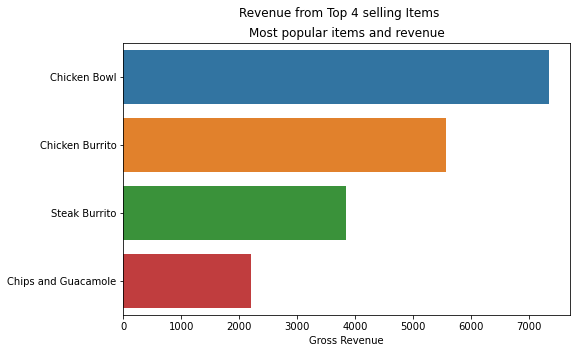

In [30]:
plt.figure(figsize = (8, 5))
sns.barplot(y = 'item_name', x = 'item_price', data = revenue)
plt.title('Most popular items and revenue')

plt.ylabel("") # to get remove the column_name
plt.xlabel("Gross Revenue")
plt.suptitle("Revenue from Top 4 selling Items")

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [31]:
sleepstudy = data('sleepstudy')
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str)

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

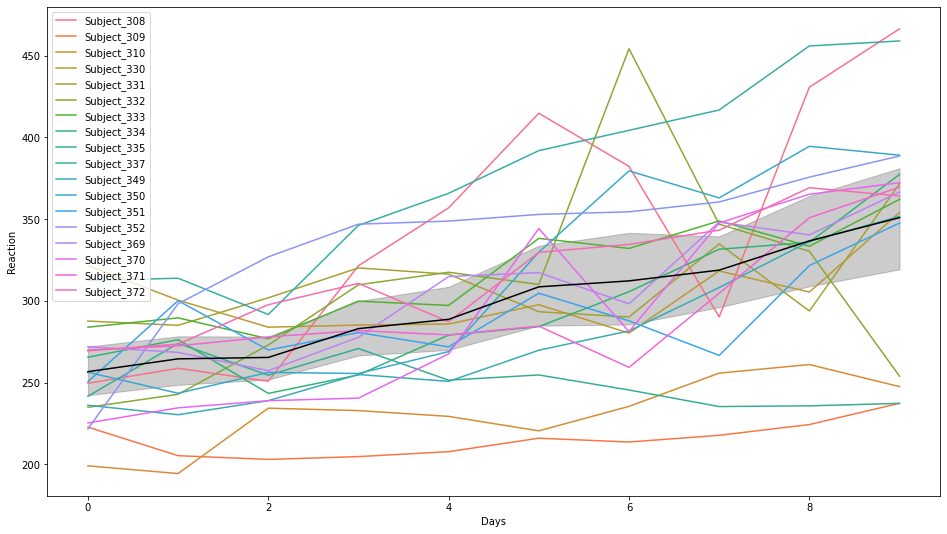

In [32]:
plt.figure(figsize=(16, 9))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', estimator = 'mean')